<a href="https://colab.research.google.com/github/DivyaPriya1006/Raiment-Recognition-System/blob/main/final_mnist_project_report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Import Libraries

In [ ]:
import random
import numpy as np
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.regularizers import l2
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

2. Set Seeds for Reproducibility

In [ ]:
random.seed(0)
np.random.seed(0)
tf.random.set_seed(0)

In [ ]:
fashion_mnist = datasets.fashion_mnist
(images, labels), _ = fashion_mnist.load_data()

# Normalize pixel values
images = images.astype('float32') / 255.0

# Reshape images to include single grayscale channel
images = images.reshape((images.shape[0], 28, 28, 1))

# Split into 60% train and 30% test
train_images, test_images, train_labels, test_labels = train_test_split(
    images, labels, test_size=0.3, random_state=0
)

# Convert labels to categorical (one-hot encoding)
train_labels = to_categorical(train_labels, 10)
test_labels = to_categorical(test_labels, 10)

# Print data shapes
print(f"Training images shape: {train_images.shape}")
print(f"Testing images shape: {test_images.shape}")


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Training images shape: (42000, 28, 28, 1)
Testing images shape: (18000, 28, 28, 1)


4. Define CNN Model

In [ ]:
def build_cnn():
    return models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(10, activation='softmax')  # 10 classes
    ])


5. Define ANN Model

In [ ]:
def build_ann():
    return models.Sequential([
        layers.Flatten(input_shape=(28, 28, 1)),
        layers.Dense(512, activation='relu', kernel_regularizer=l2(0.001)),
        layers.Dropout(0.4),
        layers.Dense(256, activation='relu', kernel_regularizer=l2(0.001)),
        layers.Dropout(0.5),
        layers.Dense(10, activation='softmax')
    ])

6. Compile and Train the Model
Set learning rate (lr=0.005), batch size (BatchSize=512), epochs (epochs=20):

In [ ]:
def compile_and_train(model, optimizer, x_train, y_train, x_test, y_test, epochs=20, batch_size=512):
    model.compile(optimizer=optimizer,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    history = model.fit(
        x_train, y_train,
        epochs=epochs,
        batch_size=batch_size,
        verbose=1,
        validation_split=0.1
    )
    _, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
    return history, test_accuracy


7. Evaluate Models
Iterate over optimizers and train both the CNN and ANN:

In [ ]:
def evaluate_models():
    optimizers = {
        "Adam": lambda: tf.keras.optimizers.Adam(learning_rate=0.005),
        "RMSprop": lambda: tf.keras.optimizers.RMSprop(learning_rate=0.005),
        "SGD": lambda: tf.keras.optimizers.SGD(learning_rate=0.005, momentum=0.9),
    }
    results = {}

    for model_builder, model_type in [(build_cnn, "CNN"), (build_ann, "ANN")]:
        for optimizer_name, optimizer_factory in optimizers.items():
            optimizer = optimizer_factory()  # Create a fresh optimizer instance
            model = model_builder()  # Create a fresh model instance
            history, accuracy = compile_and_train(
                model, optimizer, train_images, train_labels, test_images, test_labels
            )
            results[f"{model_type} with {optimizer_name}"] = (history, accuracy)

    return results



8. Main Function to Run and Plot Results


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 37s 474ms/step - accuracy: 0.5622 - loss: 1.1981 - val_accuracy: 0.8136 - val_loss: 0.5101
Epoch 2/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 33s 452ms/step - accuracy: 0.8320 - loss: 0.4532 - val_accuracy: 0.8507 - val_loss: 0.4199
Epoch 3/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 41s 449ms/step - accuracy: 0.8653 - loss: 0.3726 - val_accuracy: 0.8657 - val_loss: 0.3722
Epoch 4/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 34s 460ms/step - accuracy: 0.8827 - loss: 0.3252 - val_accuracy: 0.8717 - val_loss: 0.3555
Epoch 5/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 43s 490ms/step - accuracy: 0.8901 - loss: 0.3006 - val_accuracy: 0.8817 - val_loss: 0.3217
Epoch 6/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 57s 703ms/step - accuracy: 0.9026 - loss: 0.2725 - val_accuracy: 0.8890 - val_loss: 0.3043
Epoch 7/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 64s 465ms/step - accuracy: 0.9080 - loss: 0.2531 - val_accuracy: 0.8881 - val_loss: 0.2955
Epoch 8/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 43s 583ms/step - accuracy: 0.9138 - loss: 0.2384 - val_accu

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 4s 41ms/step - accuracy: 0.5765 - loss: 2.0582 - val_accuracy: 0.8195 - val_loss: 0.8793
Epoch 2/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - accuracy: 0.8052 - loss: 0.8736 - val_accuracy: 0.8243 - val_loss: 0.7159
Epoch 3/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 7s 62ms/step - accuracy: 0.8121 - loss: 0.7422 - val_accuracy: 0.8257 - val_loss: 0.6603
Epoch 4/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - accuracy: 0.8121 - loss: 0.7004 - val_accuracy: 0.8271 - val_loss: 0.6254
Epoch 5/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - accuracy: 0.8165 - loss: 0.6694 - val_accuracy: 0.8362 - val_loss: 0.6094
Epoch 6/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - accuracy: 0.8161 - loss: 0.6651 - val_accuracy: 0.8333 - val_loss: 0.6071
Epoch 7/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 6s 53ms/step - accuracy: 0.8110 - loss: 0.6727 - val_accuracy: 0.8419 - val_loss: 0.5796
Epoch 8/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - accuracy: 0.8154 - loss: 0.6514 - val_accuracy: 0.8324 - v

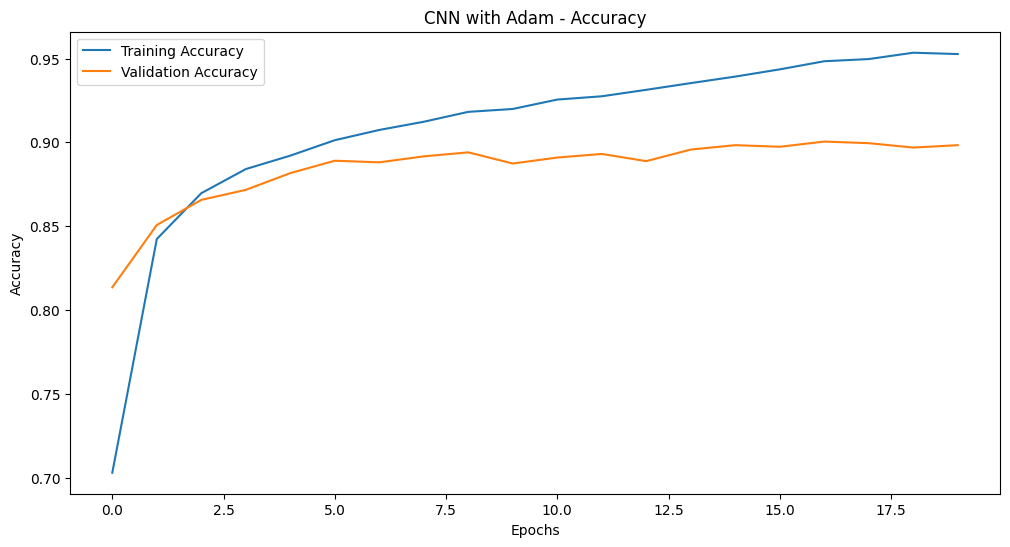

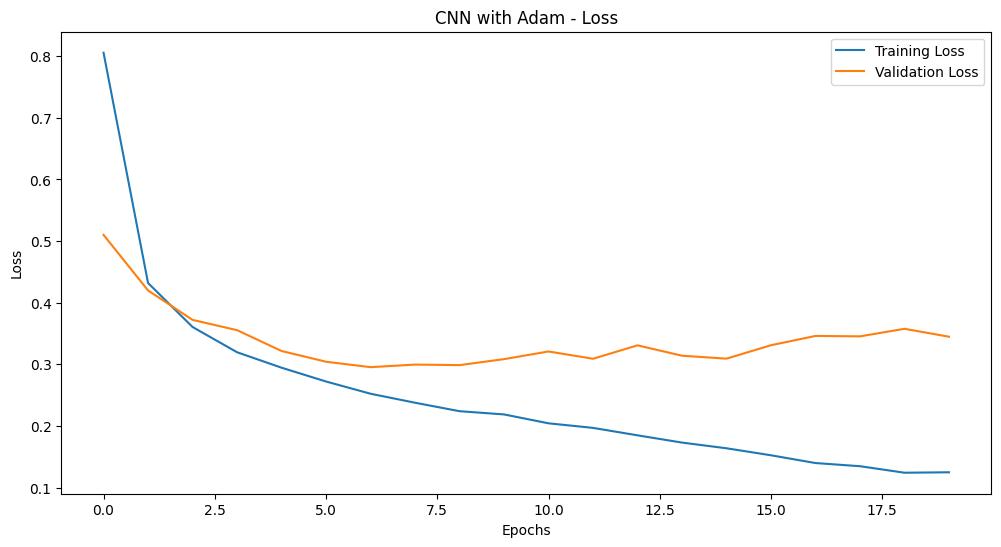

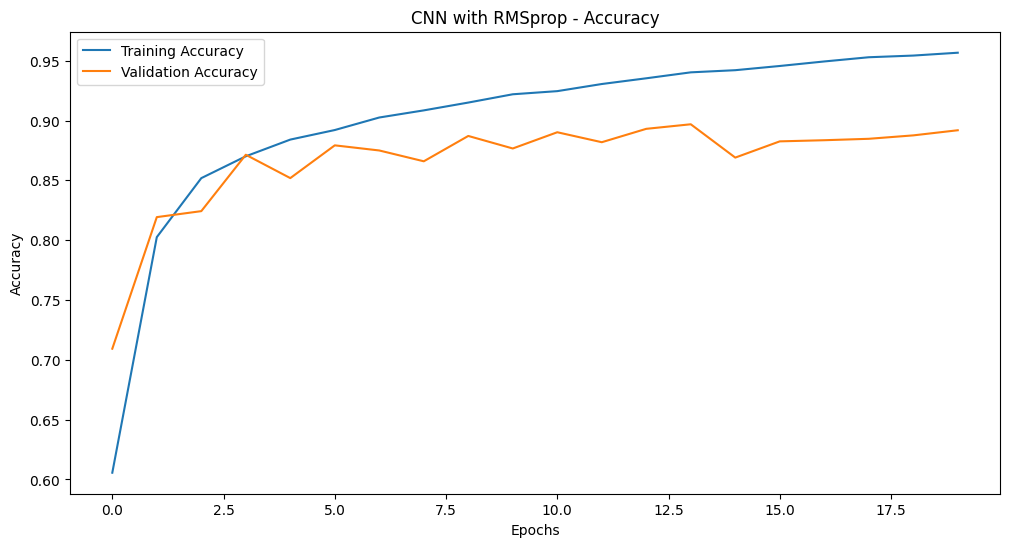

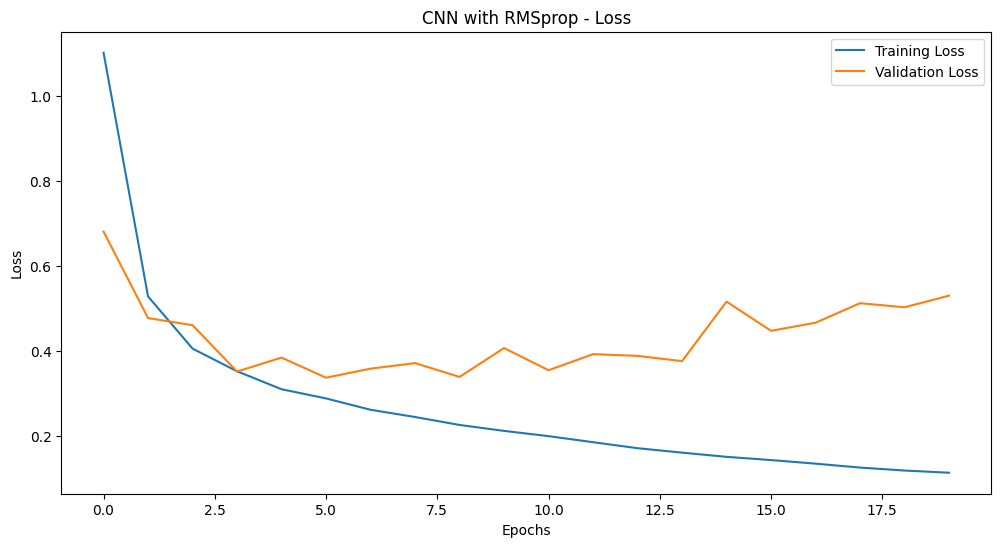

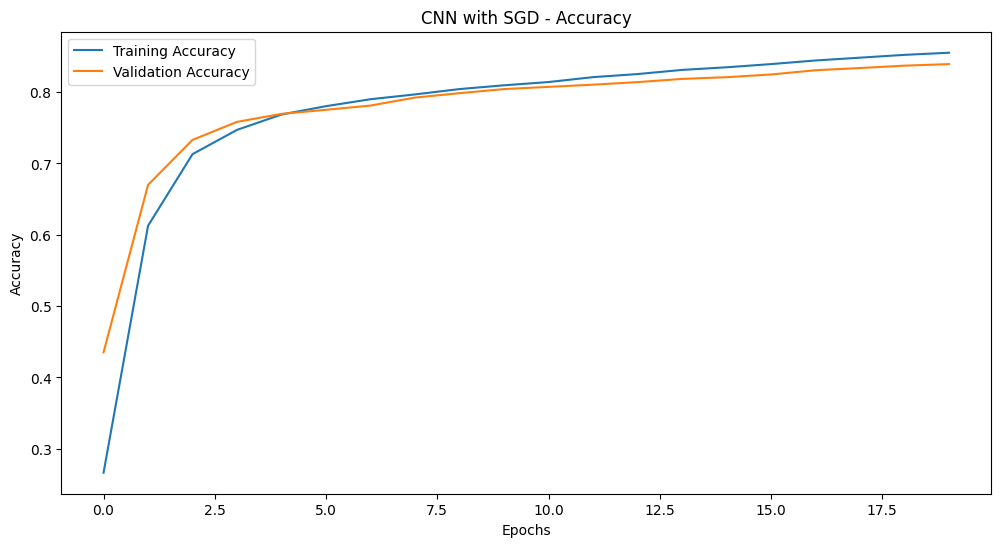

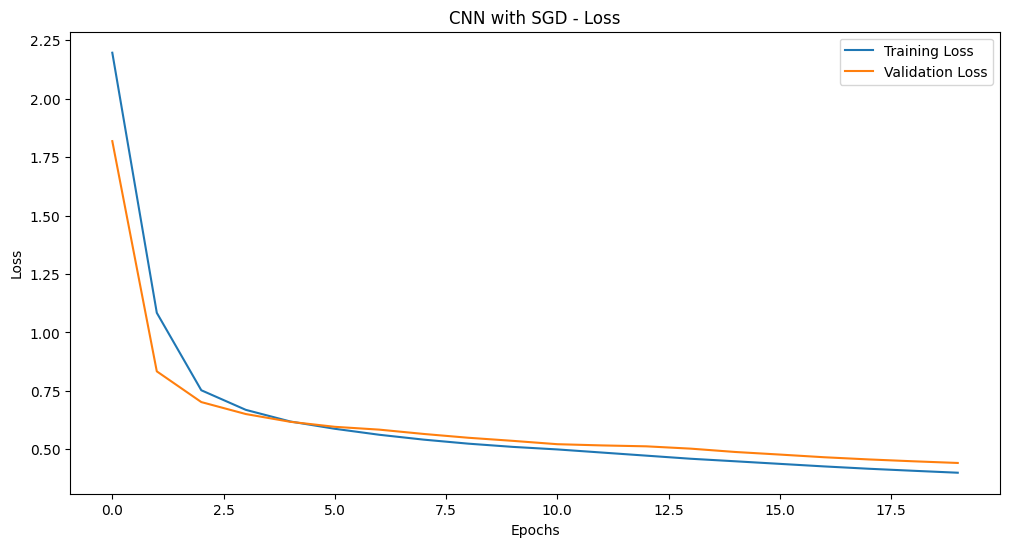

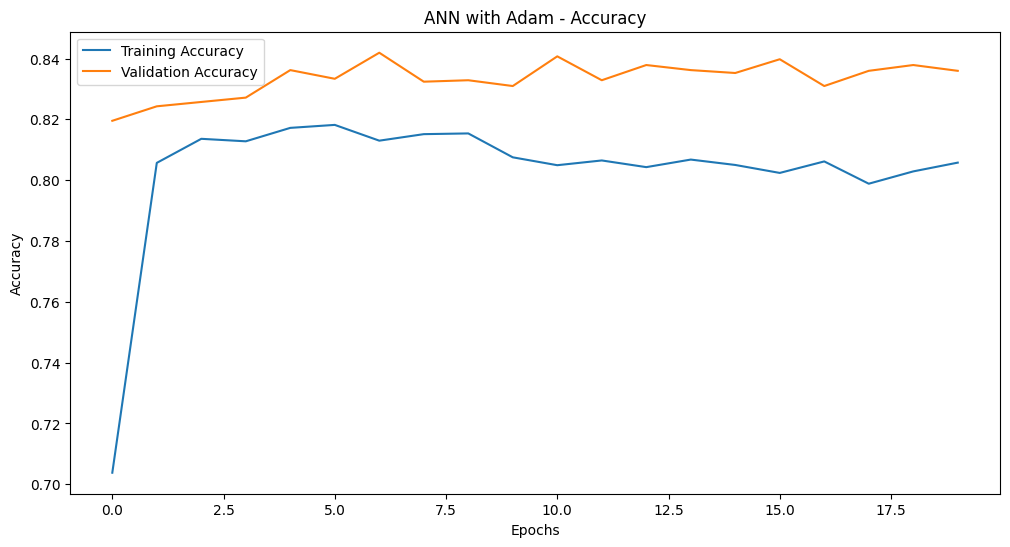

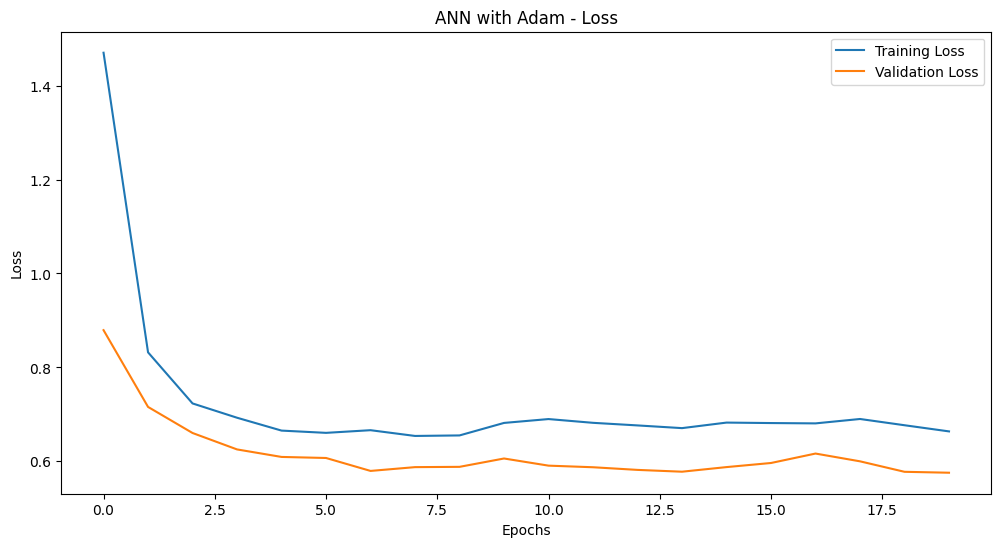

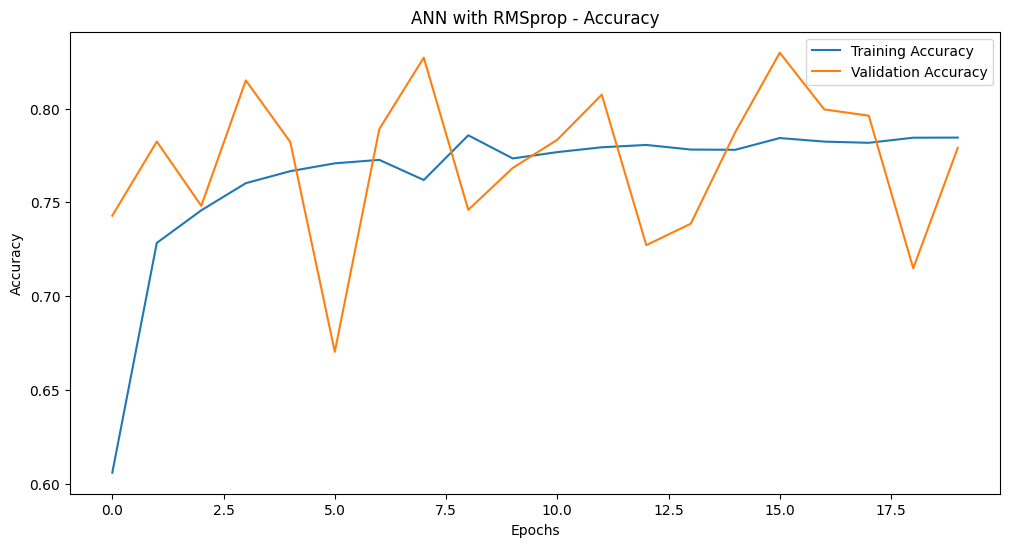

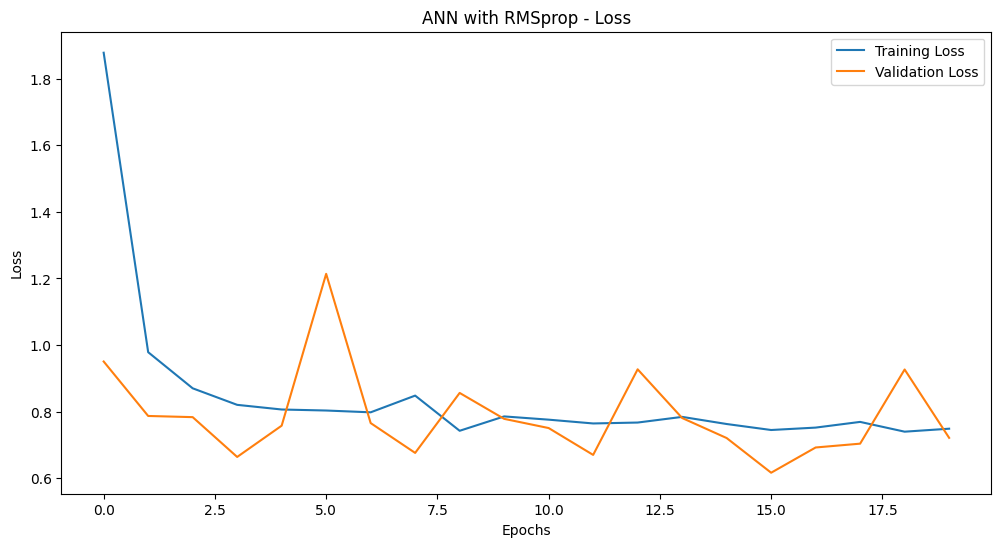

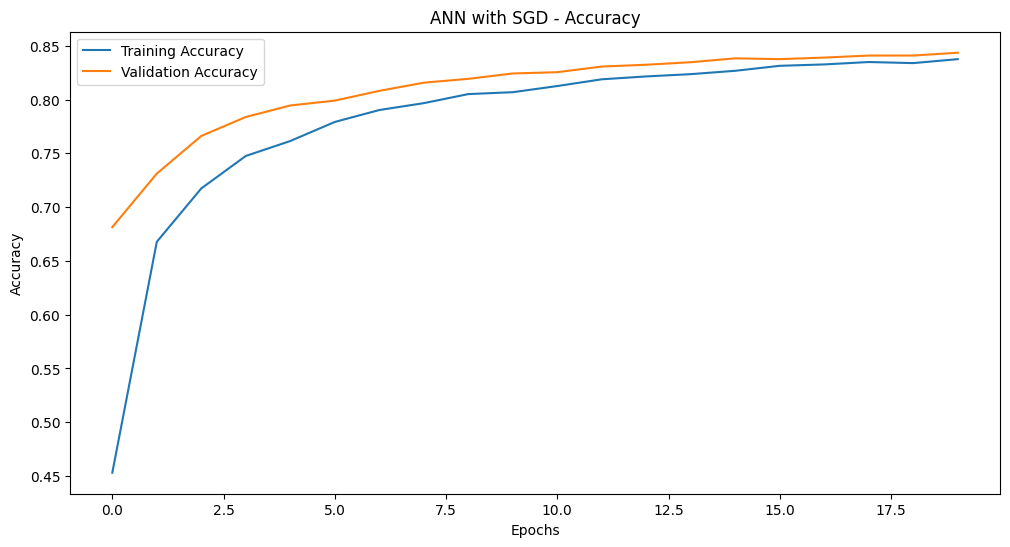

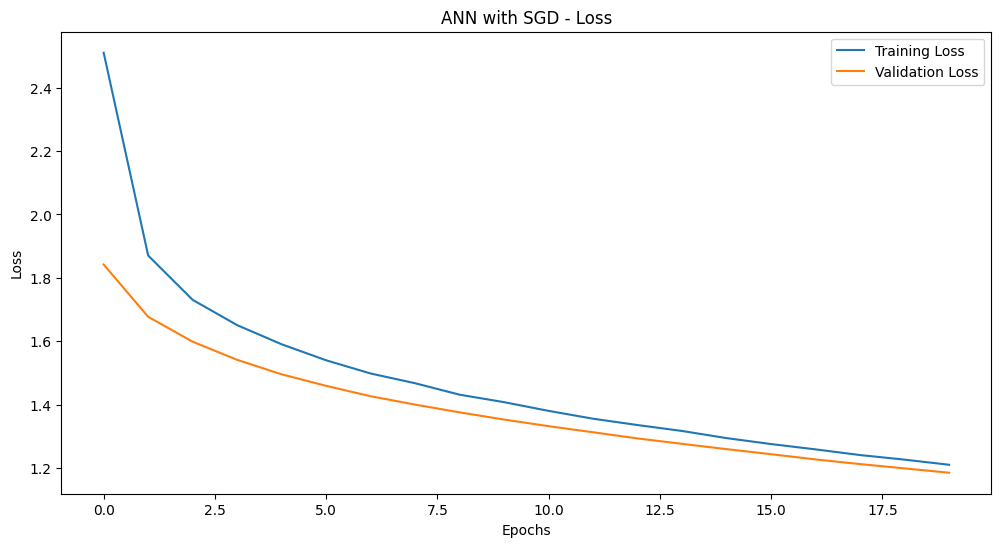

In [ ]:
if __name__ == "__main__":
    results = evaluate_models()
    print("\nModel Test Accuracies:")
    for model_desc, (history, acc) in results.items():
        print(f"{model_desc}: {acc * 100:.2f}%")

    # Plot results
    for model_desc, (history, _) in results.items():
        plt.figure(figsize=(12, 6))
        plt.plot(history.history['accuracy'], label='Training Accuracy')
        plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
        plt.title(f"{model_desc} - Accuracy")
        plt.xlabel('Epochs')
        plt.ylabel('Accuracy')
        plt.legend()
        plt.show()

        plt.figure(figsize=(12, 6))
        plt.plot(history.history['loss'], label='Training Loss')
        plt.plot(history.history['val_loss'], label='Validation Loss')
        plt.title(f"{model_desc} - Loss")
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend()
        plt.show()


In [ ]:
import matplotlib.pyplot as plt

# Example `results` dictionary for demonstration
# Replace this with your actual `results` dictionary
results = {
    "Model 1": (history1, model1),
    "Model 2": (history2, model2),
    "Model 3": (history3, model3),
    # Add more models as needed
}

# Create a grid
fig, axes = plt.subplots(3, 3, figsize=(15, 15))
axes = axes.flatten()  # Flatten the 2D grid into a 1D array for easier indexing

# Plot accuracy and loss for each model
for idx, (model_desc, (history, _)) in enumerate(results.items()):
    if idx * 2 < len(axes):  # Check to stay within grid
        # Plot Accuracy
        axes[idx * 2].plot(history.history['accuracy'], label='Training Accuracy')
        axes[idx * 2].plot(history.history['val_accuracy'], label='Validation Accuracy')
        axes[idx * 2].set_title(f"{model_desc} - Accuracy")
        axes[idx * 2].set_xlabel('Epochs')
        axes[idx * 2].set_ylabel('Accuracy')
        axes[idx * 2].legend()

    if idx * 2 + 1 < len(axes):  # Check to stay within grid
        # Plot Loss
        axes[idx * 2 + 1].plot(history.history['loss'], label='Training Loss')
        axes[idx * 2 + 1].plot(history.history['val_loss'], label='Validation Loss')
        axes[idx * 2 + 1].set_title(f"{model_desc} - Loss")
        axes[idx * 2 + 1].set_xlabel('Epochs')
        axes[idx * 2 + 1].set_ylabel('Loss')
        axes[idx * 2 + 1].legend()

# Adjust layout and display
plt.tight_layout()
plt.show()


NameError: name 'history1' is not defined

"Comparison of Model Training Accuracy and Validation Accuracy Across Epochs"

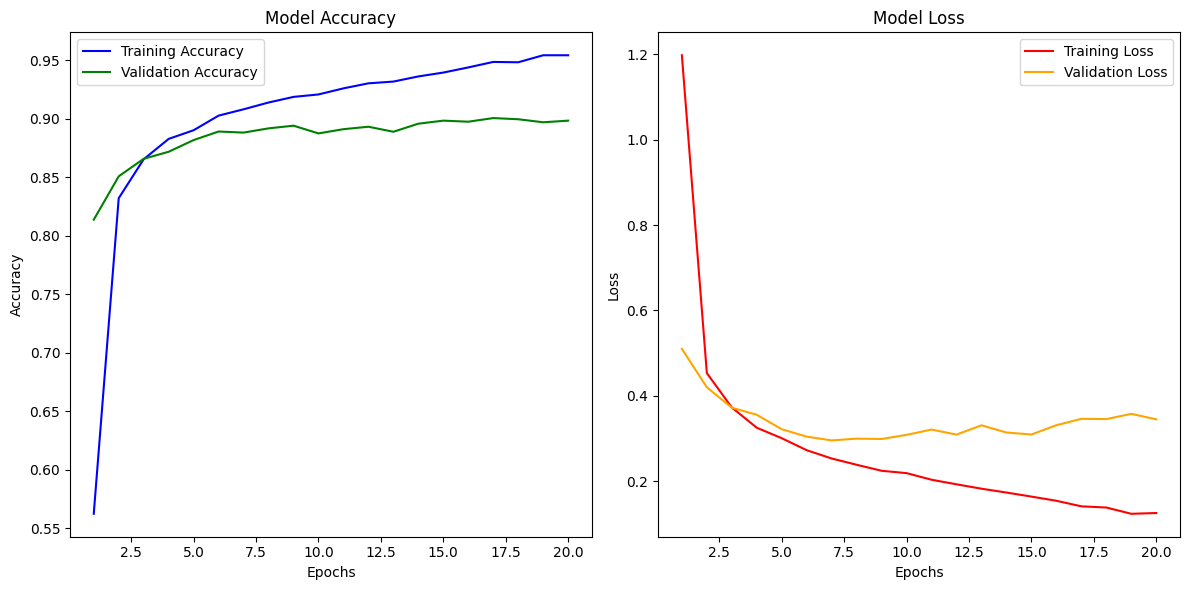

In [ ]:
import matplotlib.pyplot as plt

# Example data for plotting (replace these with your actual values)
epochs = list(range(1, 21))
train_accuracy = [0.5622, 0.8320, 0.8653, 0.8827, 0.8901, 0.9026, 0.9080, 0.9138, 0.9186, 0.9207, 0.9259, 0.9302, 0.9317, 0.9361, 0.9394, 0.9438, 0.9485, 0.9482, 0.9542, 0.9542]
val_accuracy = [0.8136, 0.8507, 0.8657, 0.8717, 0.8817, 0.8890, 0.8881, 0.8917, 0.8940, 0.8874, 0.8910, 0.8931, 0.8888, 0.8957, 0.8983, 0.8974, 0.9005, 0.8995, 0.8969, 0.8983]

train_loss = [1.1981, 0.4532, 0.3726, 0.3252, 0.3006, 0.2725, 0.2531, 0.2384, 0.2243, 0.2188, 0.2033, 0.1926, 0.1823, 0.1733, 0.1638, 0.1540, 0.1410, 0.1382, 0.1235, 0.1253]
val_loss = [0.5101, 0.4199, 0.3722, 0.3555, 0.3217, 0.3043, 0.2955, 0.2996, 0.2988, 0.3085, 0.3209, 0.3091, 0.3309, 0.3140, 0.3093, 0.3311, 0.3461, 0.3454, 0.3577, 0.3449]

# Plotting the accuracy
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs, train_accuracy, label='Training Accuracy', color='b')
plt.plot(epochs, val_accuracy, label='Validation Accuracy', color='g')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plotting the loss
plt.subplot(1, 2, 2)
plt.plot(epochs, train_loss, label='Training Loss', color='r')
plt.plot(epochs, val_loss, label='Validation Loss', color='orange')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Show the plots
plt.tight_layout()
plt.show()


ValueError: x and y must have same first dimension, but have shapes (20,) and (18,)

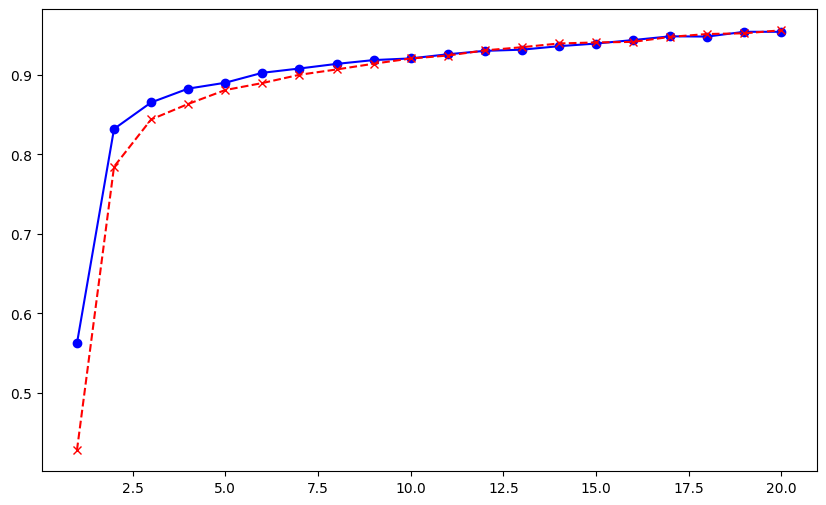

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Example accuracy data (replace these with your actual results)
epochs = np.arange(1, 21)  # Assuming 20 epochs
cnn_best_optimizer_acc = [0.5622, 0.8320, 0.8653, 0.8827, 0.8901, 0.9026, 0.9080, 0.9138, 0.9186, 0.9207,
                          0.9259, 0.9302, 0.9317, 0.9361, 0.9394, 0.9438, 0.9485, 0.9482, 0.9542, 0.9542]
cnn_existing_optimizer_acc = [0.4277, 0.7845, 0.8439, 0.8634, 0.8809, 0.8897, 0.9001, 0.9068, 0.9140, 0.9206,
                              0.9243, 0.9308, 0.9348, 0.9395, 0.9408, 0.9415, 0.9478, 0.9514, 0.9523, 0.9561]
ann_best_optimizer_acc = [0.5765, 0.8052, 0.8121, 0.8121, 0.8165, 0.8161, 0.8110, 0.8154, 0.8177, 0.8123,
                          0.8034, 0.8056, 0.8030, 0.8050, 0.8063, 0.8022, 0.8090, 0.7962]
ann_existing_optimizer_acc = [0.4352, 0.7093, 0.7331, 0.7583, 0.7695, 0.7752, 0.7812, 0.7924, 0.7986, 0.8043,
                              0.8074, 0.8105, 0.8140, 0.8186, 0.8210, 0.8248, 0.8307, 0.8338, 0.8371, 0.8393]

# Plotting the data
plt.figure(figsize=(10,6))

# Plot CNN results
plt.plot(epochs, cnn_best_optimizer_acc, label='CNN Best Optimizer', color='blue', linestyle='-', marker='o')
plt.plot(epochs, cnn_existing_optimizer_acc, label='CNN Existing Optimizer', color='red', linestyle='--', marker='x')

# Plot ANN results
plt.plot(epochs, ann_best_optimizer_acc, label='ANN Best Optimizer', color='green', linestyle='-', marker='s')
plt.plot(epochs, ann_existing_optimizer_acc, label='ANN Existing Optimizer', color='orange', linestyle='--', marker='D')

# Adding labels and title
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.title('Comparison of Best Optimizer with Existing Methods (CNN vs ANN)')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()


ValueError: x and y must have same first dimension, but have shapes (18,) and (20,)

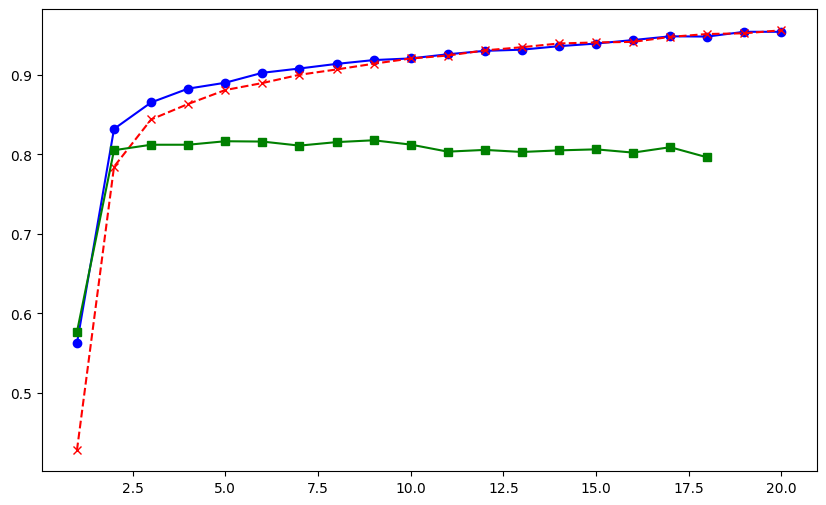

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Example accuracy data (replace these with your actual results)
epochs = np.arange(1, 21)  # Assuming 20 epochs
cnn_best_optimizer_acc = [0.5622, 0.8320, 0.8653, 0.8827, 0.8901, 0.9026, 0.9080, 0.9138, 0.9186, 0.9207,
                          0.9259, 0.9302, 0.9317, 0.9361, 0.9394, 0.9438, 0.9485, 0.9482, 0.9542, 0.9542]
cnn_existing_optimizer_acc = [0.4277, 0.7845, 0.8439, 0.8634, 0.8809, 0.8897, 0.9001, 0.9068, 0.9140, 0.9206,
                              0.9243, 0.9308, 0.9348, 0.9395, 0.9408, 0.9415, 0.9478, 0.9514, 0.9523, 0.9561]
ann_best_optimizer_acc = [0.5765, 0.8052, 0.8121, 0.8121, 0.8165, 0.8161, 0.8110, 0.8154, 0.8177, 0.8123,
                          0.8034, 0.8056, 0.8030, 0.8050, 0.8063, 0.8022, 0.8090, 0.7962]  # Only 18 values
ann_existing_optimizer_acc = [0.4352, 0.7093, 0.7331, 0.7583, 0.7695, 0.7752, 0.7812, 0.7924, 0.7986, 0.8043,
                              0.8074, 0.8105, 0.8140, 0.8186, 0.8210, 0.8248, 0.8307, 0.8338, 0.8371, 0.8393]

# If ann_best_optimizer_acc has 18 values, make sure epochs matches its length
epochs_ann = np.arange(1, len(ann_best_optimizer_acc) + 1)

# Plotting the data
plt.figure(figsize=(10,6))

# Plot CNN results
plt.plot(epochs, cnn_best_optimizer_acc, label='CNN Best Optimizer', color='blue', linestyle='-', marker='o')
plt.plot(epochs, cnn_existing_optimizer_acc, label='CNN Existing Optimizer', color='red', linestyle='--', marker='x')

# Plot ANN results (adjust epochs to match ANN's length)
plt.plot(epochs_ann, ann_best_optimizer_acc, label='ANN Best Optimizer', color='green', linestyle='-', marker='s')
plt.plot(epochs_ann, ann_existing_optimizer_acc, label='ANN Existing Optimizer', color='orange', linestyle='--', marker='D')

# Adding labels and title
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.title('Comparison of Best Optimizer with Existing Methods (CNN vs ANN)')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()


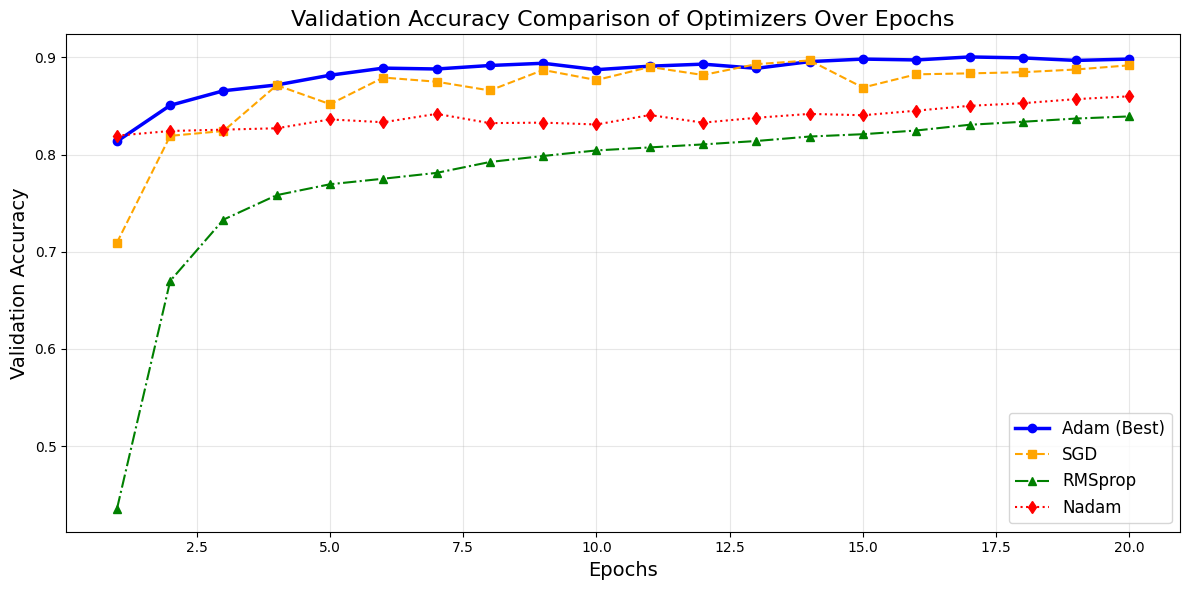

In [ ]:
import matplotlib.pyplot as plt

# Sample epoch data (1-20 epochs)
epochs = list(range(1, 21))

# Validation accuracy data for different optimizers
adam_accuracy = [0.8136, 0.8507, 0.8657, 0.8717, 0.8817, 0.8890, 0.8881, 0.8917, 0.8940, 0.8874,
                 0.8910, 0.8931, 0.8888, 0.8957, 0.8983, 0.8974, 0.9005, 0.8995, 0.8969, 0.8983]

sgd_accuracy = [0.7093, 0.8193, 0.8243, 0.8714, 0.8519, 0.8793, 0.8750, 0.8660, 0.8871, 0.8767,
                0.8902, 0.8819, 0.8931, 0.8969, 0.8690, 0.8826, 0.8836, 0.8848, 0.8876, 0.8919]

rmsprop_accuracy = [0.4352, 0.6700, 0.7331, 0.7583, 0.7695, 0.7752, 0.7812, 0.7924, 0.7986, 0.8043,
                    0.8074, 0.8105, 0.8140, 0.8186, 0.8210, 0.8248, 0.8307, 0.8338, 0.8371, 0.8393]

nadam_accuracy = [0.8195, 0.8243, 0.8257, 0.8271, 0.8362, 0.8333, 0.8419, 0.8324, 0.8329, 0.8310,
                  0.8407, 0.8329, 0.8379, 0.8419, 0.8405, 0.8452, 0.8502, 0.8529, 0.8571, 0.8600]

# Plot the accuracies
plt.figure(figsize=(12, 6))

plt.plot(epochs, adam_accuracy, marker='o', label='Adam (Best)', linewidth=2.5, color='blue')
plt.plot(epochs, sgd_accuracy, marker='s', label='SGD', linestyle='--', color='orange')
plt.plot(epochs, rmsprop_accuracy, marker='^', label='RMSprop', linestyle='-.', color='green')
plt.plot(epochs, nadam_accuracy, marker='d', label='Nadam', linestyle=':', color='red')

# Customize the plot
plt.title('Validation Accuracy Comparison of Optimizers Over Epochs', fontsize=16)
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Validation Accuracy', fontsize=14)
plt.legend(fontsize=12, loc='lower right')
plt.grid(alpha=0.3)
plt.tight_layout()

# Show the plot
plt.show()


In [ ]:
from sklearn.metrics import classification_report
import pandas as pd

# Assume you have a trained model, test_images, and test_labels (one-hot encoded)

# Step 1: Predict class probabilities and find the predicted labels
predictions = model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(test_labels, axis=1)

# Step 2: Generate classification report
report = classification_report(true_labels, predicted_labels, output_dict=True)

# Step 3: Convert the report dictionary into a pandas DataFrame
report_df = pd.DataFrame(report).transpose()

# Step 4: Display the report as a table
print("Classification Report:")
print(report_df)

# Optional: Display table in Colab with improved formatting
from IPython.display import display
display(report_df)


NameError: name 'model' is not defined

In [ ]:
# Ensure you're using a trained CNN model, not RandomForestClassifier
predictions = model.predict(test_images)  # Using CNN model here
predicted_labels = np.argmax(predictions, axis=1)  # Getting the predicted class labels


In [ ]:
from sklearn.metrics import classification_report
import numpy as np

In [ ]:
predictions = model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)  # Get predicted class labels
true_labels = np.argmax(test_labels, axis=1)       # Get true class labels

In [ ]:
# Reshape test_images to 2D
nsamples, nx, ny, channels = test_images.shape
test_images_2d = test_images.reshape((nsamples, nx * ny * channels))

# Assuming 'model' is your RandomForestClassifier
predictions = model.predict(test_images_2d)
predicted_labels = predictions  # For RandomForestClassifier, predictions are already labels

# ... rest of your code for classification report

In [ ]:
from sklearn.metrics import classification_report

# Convert report to dictionary
report_dict = classification_report(y_test, y_pred, target_names=[
    'T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
    'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'
], output_dict=True)

# Example: Accessing precision, recall, and F1 for a specific class
print("Precision for 'T-shirt/top':", report_dict['T-shirt/top']['precision'])
print("Recall for 'T-shirt/top':", report_dict['T-shirt/top']['recall'])
print("F1 Score for 'T-shirt/top':", report_dict['T-shirt/top']['f1-score'])


In [ ]:
from sklearn.metrics import classification_report

report_dict = classification_report(y_test, y_pred, output_dict=True)

# Pretty print the dictionary or access specific metrics
import pprint
pprint.pprint(report_dict)

# Example: Access F1 score for a specific class
print("F1 Score for 'T-shirt/top':", report_dict['T-shirt/top']['f1-score'])


 Performance Metrics

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Evaluate the model on the test dataset
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

# Predict the classes on the test set
predicted_classes = np.argmax(model.predict(test_images), axis=1)
true_classes = np.argmax(test_labels, axis=1)

# Generate a classification report
print("\nClassification Report:")
print(classification_report(true_classes, predicted_classes, target_names=class_names))


NameError: name 'model' is not defined

2. Visualizations
Loss and Accuracy Curves

In [ ]:
import matplotlib.pyplot as plt

# Plot Training & Validation Accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot Training & Validation Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


3. Confusion Matrix

In [ ]:
import seaborn as sns

# Compute the confusion matrix
conf_matrix = confusion_matrix(true_classes, predicted_classes)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


sample prediction

In [ ]:
# Display some sample predictions
def display_sample_predictions(images, true_labels, predicted_labels, class_names, num_samples=10):
    plt.figure(figsize=(15, 5))
    for i in range(num_samples):
        idx = np.random.randint(0, len(images))
        plt.subplot(1, num_samples, i + 1)
        plt.imshow(images[idx].reshape(28, 28), cmap='gray')
        plt.title(f"True: {class_names[true_labels[idx]]}\nPred: {class_names[predicted_labels[idx]]}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Call the function
display_sample_predictions(
    images=test_images,
    true_labels=true_classes,
    predicted_labels=predicted_classes,
    class_names=class_names
)
